In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasai import PandasAI 
from pandasai.llm.openai import OpenAI
import seaborn as sns

How would you calculate the total sum of values in a specific column using both Pandas and NumPy?

In [3]:
country_wise = pd.read_csv('D:/Project/Normal-Data-Visulization/datasets/Covid-19/country_wise_latest.csv')

country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


**Exploration:** What are the total number of rows and columns in the dataset? Display the data types of each column

In [4]:
len(country_wise) , len(country_wise.columns.values)

(187, 15)

**Handling Missing Values:** Are there any missing values in the dataset? If so, replace them with appropriate values (e.g., mean for numerical columns).

In [5]:
country_wise.fillna(0, inplace=True)

**Statistical Summary:** Generate a summary of statistical measures (mean, median, min, max) for all numerical columns in the dataset.

In [6]:
country_wise['Confirmed'].mean(), country_wise['Confirmed'].median(), country_wise['Confirmed'].min(), country_wise['Confirmed'].max()

country_wise['Deaths'].mean(), country_wise['Deaths'].median(), country_wise['Deaths'].min(), country_wise['Deaths'].max()

country_wise['Recovered'].mean(), country_wise['Recovered'].median(), country_wise['Recovered'].min(), country_wise['Recovered'].max()

country_wise['Active'].mean(), country_wise['Active'].median(), country_wise['Active'].min(), country_wise['Active'].max()

country_wise['New cases'].mean(), country_wise['New cases'].median(), country_wise['New cases'].min(), country_wise['New cases'].max()

country_wise['Deaths / 100 Cases'].mean(), country_wise['Deaths / 100 Cases'].median(), country_wise['Deaths / 100 Cases'].min(), country_wise['Deaths / 100 Cases'].max()

country_wise['Recovered / 100 Cases'].mean(), country_wise['Recovered / 100 Cases'].median(), country_wise['Recovered / 100 Cases'].min(), country_wise['Recovered / 100 Cases'].max()

country_wise['Deaths / 100 Recovered'].mean(), country_wise['Deaths / 100 Recovered'].median(), country_wise['Deaths / 100 Recovered'].min(), country_wise['Deaths / 100 Recovered'].max()

country_wise['Confirmed last week'].mean(), country_wise['Confirmed last week'].median(), country_wise['Confirmed last week'].min(), country_wise['Confirmed last week'].max()

country_wise['1 week change'].mean(), country_wise['1 week change'].median(), country_wise['1 week change'].min(), country_wise['1 week change'].max()

country_wise['1 week % increase'].mean(), country_wise['1 week % increase'].median(), country_wise['1 week % increase'].min(), country_wise['1 week % increase'].max()

(np.float64(13.606203208556147),
 np.float64(6.89),
 np.float64(-3.84),
 np.float64(226.32))

**Filtering Data:** Filter the dataset to display only countries where the "Confirmed" cases exceed 1,000,000.

In [7]:
country_wise[country_wise['Confirmed'] > 1000000]['Country/Region'].reset_index(drop=True)

0    Brazil
1     India
2        US
Name: Country/Region, dtype: object

**Grouping and Aggregation:** Group the dataset by the "WHO Region" column and calculate the total "Deaths" for each region.

In [8]:
country_wise.groupby('WHO Region')['Deaths'].sum()

WHO Region
Africa                    12223
Americas                 342732
Eastern Mediterranean     38339
Europe                   211144
South-East Asia           41349
Western Pacific            8249
Name: Deaths, dtype: int64

**Sorting:** Sort the dataset by the "Deaths" column in descending order and display the top 10 countries with the highest deaths.

In [9]:
country_wise.sort_values('Deaths', ascending=False).head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
85,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
61,France,220352,30212,81212,108928,2551,17,267,13.71,36.86,37.20,214023,6329,2.96,Europe
157,Spain,272421,28432,150376,93613,0,0,0,10.44,55.20,18.91,264836,7585,2.86,Europe
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


**Column Operations:** Create a new column named "Death Rate" that is the ratio of "Deaths" to "Confirmed" cases multiplied by 100.

In [10]:
country_wise['Death Rate'] = (country_wise['Deaths'] / country_wise['Confirmed']) * 100

country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Death Rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,4.157581
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,5.733186
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,4.315789


**Unique Values:** How many unique countries and WHO Regions are present in the dataset?

In [11]:
len(np.unique(country_wise['Country/Region'])) , len(np.unique(country_wise['WHO Region']))

(187, 6)

**Correlation Matrix:** Compute the correlation matrix for all numerical columns and display it using Pandas.

In [12]:
country_wise.select_dtypes(include=[np.number]).corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,Death Rate
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161,0.063518
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708,0.251533
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697,0.048380
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752,0.054376
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791,0.020069
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293,0.060368
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662,0.017048
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534,1.000000
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254,-0.168961
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083,0.334710


**Bar Plot:** Create a bar plot using Matplotlib to compare the total "Confirmed" cases for the top 10 countries.

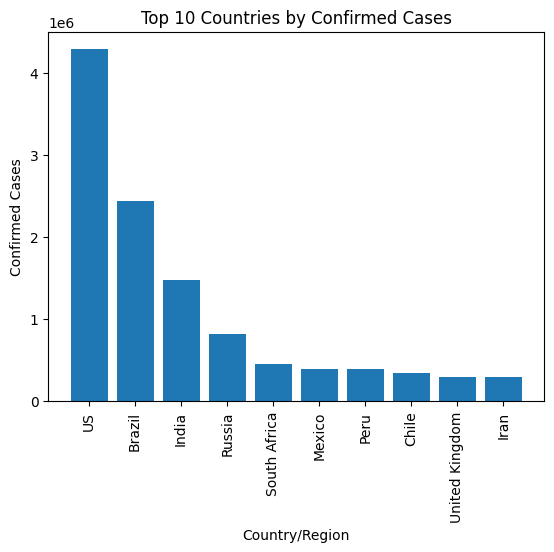

In [18]:
top_10_countries = country_wise.sort_values('Confirmed', ascending=False).head(10)
plt.bar(top_10_countries['Country/Region'], top_10_countries['Confirmed'])
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xticks(rotation=90)
plt.show()

**Scatter Plot:** Use Seaborn to create a scatter plot showing the relationship between "Confirmed" and "Deaths."

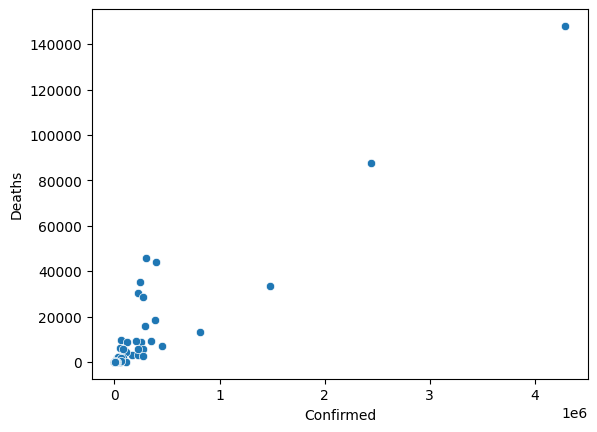

In [21]:
sns.scatterplot(x = 'Confirmed' , y = 'Deaths' , data = country_wise)
plt.show()

**Heatmap:** Plot a heatmap of the correlation matrix using Seaborn to analyze relationships between numerical columns.

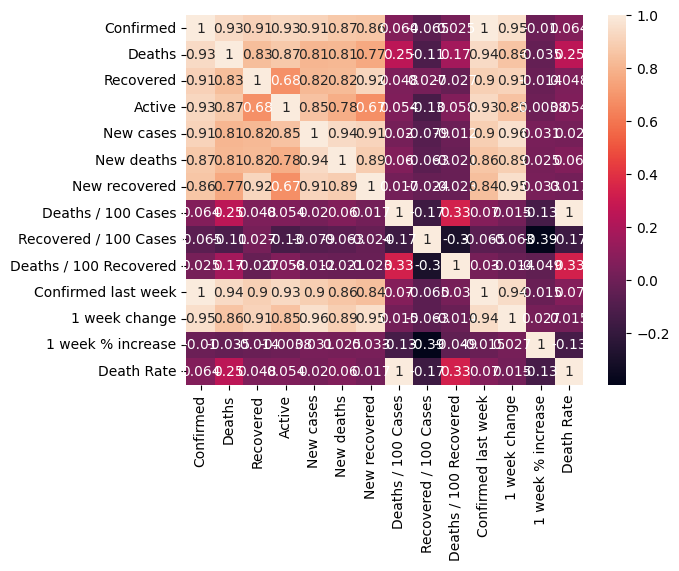

In [23]:
sns.heatmap(country_wise.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

**Line Plot:** Visualize the "Active" cases for the top 5 countries with the highest confirmed cases using a Matplotlib line plot.

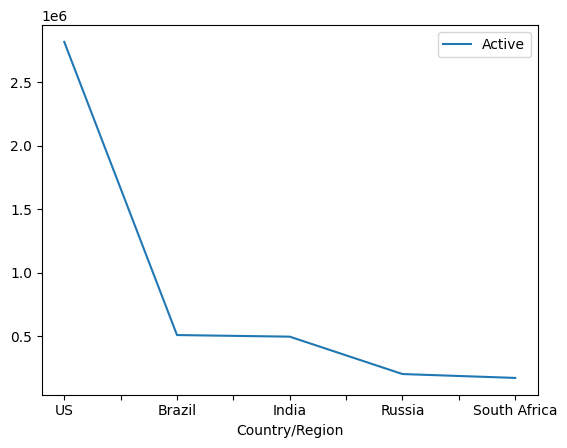

In [ ]:
highest_confirmed = country_wise.sort_values('Confirmed', ascending=False).head(5)
highest_confirmed.plot('Country/Region' , 'Active')
plt.show()

**Histogram:** Plot a histogram using Matplotlib to show the distribution of "Recovered" cases across all countries.

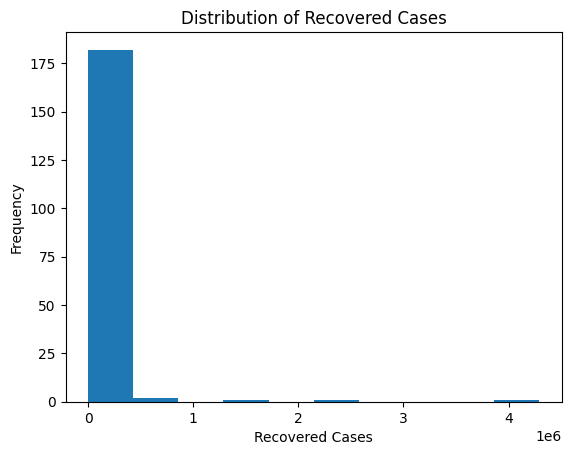

In [35]:
plt.hist(country_wise['Confirmed'])
plt.xlabel('Recovered Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Recovered Cases')
plt.show()

**Boxplot:** Use Seaborn to create a boxplot showing the distribution of "Death Rate" across different WHO Regions.

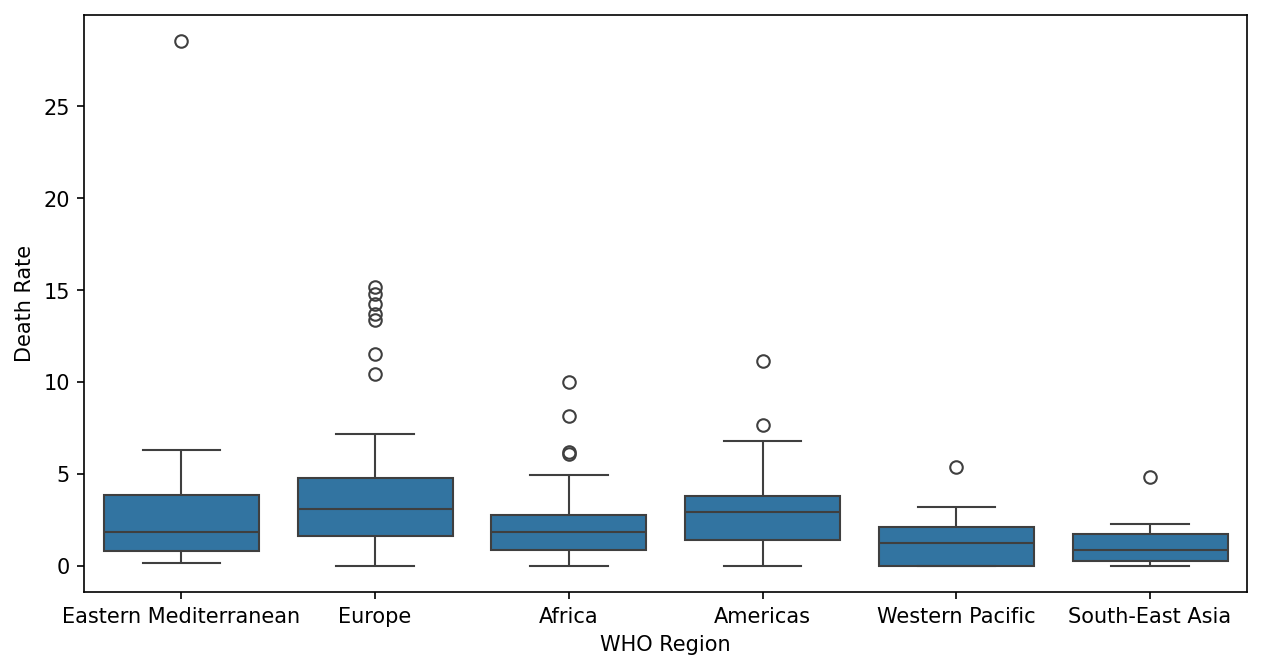

In [38]:
plt.figure(figsize=(10, 5) , dpi=150)
sns.boxplot(x = 'WHO Region' , y = 'Death Rate' , data = country_wise)
plt.show()